**CURSO**: *Machine Learning* en Geociencias<br />
**Profesor**: Edier Aristizábal (evaristizabalg@unal.edu.co) <br />
**Credits**: The content of this notebook is taken from several sources: Every effort has been made to trace copyright holders of the materials used in this book. The author apologies for any unintentional omissions and would be pleased to add an acknowledgment in future editions.

# 04: Procesamiento de datos (*Feature Engineering*)

Luego de obtener e importar los datos se debe realizar una ardua tarea de limpieza y ajuste de los datos. En esta labor se transforman simples valores y datos crudos en realmente variables (*features*) que puedan permitir construir un modelo. Muchos autores consideran que esta fase corresponde al 80% del tiempo dedicado a *machine learning*, por lo cual los resultados finales obtenidos del modelo dependen en un porcentaje similar a la calidad de los datos y variables que conforman el modelo, que se obtiene como resultado de esta fase.

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Las principales librerias utilizadas para el procesamiento de los datos corresponden a *Pandas* y *Numpy*. Sin embargo existen funciones en otros librerías que mas adelante se utilizarán. Por ahora solo importaremos estas dos fundamentales librerías.

In [1]:
import pandas as pd
import numpy as np

## Web scraping

In [ ]:
from IPython.display import IFrame
from IPython.core.display import HTML
from bs4 import BeautifulSoup
from IPython.display import IFrame

In [2]:
# IFrame will allow us to view the HTML document
IFrame(src='https://edieraristizabal.github.io/MachineLearning/', width=800, height=400)

In [5]:
# Open a file and pass the file handle (here file handle is f) to BeautifulSoup
file_name = '/content/drive/MyDrive/CATEDRA/MACHINE LEARNING/MachineLearning/data/Machine learning en geociencias _ MachineLearning.html'
with open(file_name) as f:  #Windows users may need to add the option encoding='utf8'
    stock_soup = BeautifulSoup(f, 'html.parser')

In [6]:
# Look at first 1000 characters to see head of the document (don't want to print too much or it's messy)
print(stock_soup.prettify()[:1000])

<!DOCTYPE html>
<!-- saved from url=(0051)https://edieraristizabal.github.io/MachineLearning/ -->
<html lang="en-US">
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Begin Jekyll SEO tag v2.8.0 -->
  <title>
   Machine learning en geociencias | MachineLearning
  </title>
  <meta content="Jekyll v3.9.2" name="generator"/>
  <meta content="Machine learning en geociencias" property="og:title"/>
  <meta content="en_US" property="og:locale"/>
  <meta content="Curso del posgrado en Recursos hidráulicos de la Facultad de Minas, Universidad Nacional de Colombia, sede Medellín" name="description"/>
  <meta content="Curso del posgrado en Recursos hidráulicos de la Facultad de Minas, Universidad Nacional de Colombia, sede Medellín" property="og:description"/>
  <link href="https://edieraristizabal.github.io/MachineLearning/" rel="ca

In [ ]:
tag_list = []
for tag in stock_soup.find_all():
    print(tag)

In [ ]:
# One possible solution
tag_list = []
for tag in stock_soup.find_all():
    tag_list.append(tag.name)

tag_count_dict = {}
for tag_name in tag_list:
    if tag_name in tag_count_dict:
        tag_count_dict[tag_name] = tag_count_dict[tag_name] + 1
    else:
        tag_count_dict[tag_name] = 1
        
tag_count_dict

{'html': 1,
 'head': 1,
 'meta': 13,
 'title': 1,
 'link': 2,
 'script': 3,
 'body': 1,
 'div': 1,
 'header': 1,
 'h1': 2,
 'a': 27,
 'p': 10,
 'small': 2,
 'section': 1,
 'strong': 1,
 'em': 8,
 'h2': 5,
 'ul': 1,
 'li': 20,
 'footer': 1}

In [ ]:
stock_soup.find_all("h2")

[<h2 id="programa-del-curso">Programa del curso</h2>,
 <h2 id="horario-del-curso">Horario del curso</h2>,
 <h2 id="link-para-clases-virtuales">Link para clases virtuales</h2>,
 <h2 id="contenido-del-curso">Contenido del curso</h2>,
 <h2 id="notebooks">Notebooks</h2>]

In [8]:
import urllib # package required to interact with live webpage
# Scrape data from website
site_url='https://edieraristizabal.github.io/Geomorfologia/'
r = urllib.request.urlopen(site_url)
site_content = r.read().decode('utf-8')

# Saving scraped HTML to .html file (for later processing)
with open('saved_page.html', 'w') as f:
    f.write(site_content)

# Use html.parser to create soup
s = BeautifulSoup(site_content, 'html.parser')

In [ ]:
# Look at the soup object by using prettify() method
print(s.prettify()[:500]) # Only show portion of text as it is very long

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <!-- Begin Jekyll SEO tag v2.8.0 -->
  <title>
   Geomorfología | Geomorfologia
  </title>
  <meta content="Jekyll v3.9.0" name="generator">
   <meta content="Geomorfología" property="og:title">
    <meta content="en_US" property="og:locale">
     <meta content="Curso de la carrera Ingeniería geoló


## Datos locales

Para este ejercicio vamos a trabajar con la base de datos de torrencialidad del libro 3.

In [ ]:
data= pd.read_excel('G:/My Drive/CATEDRA/MACHINE LEARNING/datos/procesamiento_datos.xlsx', sheet_name='Sheet1')
data.head(5)

,Unnamed: 0,Name,Color,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,...,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Categoria,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record
0,0,DESMOTADORA (Dabeiba),amarillo,2.0,3,4.9820,4.048,0.907351,2.00,2.204219,...,0.602168,0.567260,0.515155,1.319,A,0.223408,1.280198,0.582183,-0.540971,Torrencial
1,1,LA ARBOLEDA (Cdad Bolivar) ¿represamiento?,verde,2.0,3,6.5693,5.997,0.531716,2.00,3.761404,...,0.45667,0.107055,1.032682,1.968,B,0.219618,0.952858,0.534278,-0.626839,Torrencial
2,2,LIBORIANA (Salgar),NaN,3.0,12,31.8530,18.117,1.496572,3.25,2.099288,...,0.376731,0.111298,0.919901,2.484,A,0.120483,1.350146,0.324482,-1.125524,Torrencial
3,3,LA ARENOSA (San Carlos),amarillo,NaN,31,338.2300,6.152,2.050357,5.00,2.96581,...,1.171624,5.639499,0.227900,0.903,B,0.125434,1.981134,0.260024,-1.346980,Torrencial
4,4,EL BARRO (Bello),rojo,NaN,4,10.4070,7.350,5.128386,3.00,0.584979,...,0.384357,0.363731,0.513981,1.299,B,0.136407,1.263665,0.397153,-0.923434,Torrencial


In [ ]:
data.shape

(73, 33)

Se construye tambien, a partir de la tabla importada, el vector de la variable dependiente (y) y la matriz con las variables independientes (X).

In [ ]:
X=data.drop(['Name', 'Flash flood record'],axis=1)
y=data['Flash flood record']

Inicialmente es importante obtener datos generales de la base de datos, tales como el número de variables (columnas) y el número de observaciones (filas) con que se cuenta, utilizando el método *shape*.

In [ ]:
X.shape

(73, 31)

Es importante también conocer el nombre de las variables o columnas, el número de datos no nulos que tiene cada una, y el tipo de datos. Para esto utilizaremos la función *info*.

In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73 entries, 0 to 72
Data columns (total 31 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Unnamed: 0                   73 non-null     int64  
 1   Color                        72 non-null     object 
 2   Main Stream Order            37 non-null     float64
 3   Number of streams            73 non-null     object 
 4   Stream Lenght                73 non-null     float64
 5   Main Stream Leght            68 non-null     float64
 6   Stream Lenght Ratio          73 non-null     float64
 7   Bifurcation Ratio            73 non-null     float64
 8   Ro Coefficient               72 non-null     object 
 9   Lenght of Basin              73 non-null     float64
 10  Area                         73 non-null     float64
 11  Perimeter                    72 non-null     float64
 12  Form Factor                  72 non-null     float64
 13  Elongation Ratio      

En ocasiones es necesario conocer el número de datos unicos que presenta cada columna, especialmente para variables categóricas, ya que dicho número representa el número de categorias o conjuntos del dominio de dicha variable. A continuación se observa que variables como *color*, las cuales representan un atributo de mi objeto de estudio, tiene solo 4 colores, para la variable categórica se presentan 3 diferentes valores y para la columna final, que representa la variable objetivo, tiene solo dos opciones, es decir que corresponde a una variable dicotómica.

In [ ]:
X.nunique()

Unnamed: 0                     73
Color                           3
Main Stream Order               3
Number of streams              42
Stream Lenght                  73
Main Stream Leght              67
Stream Lenght Ratio            73
Bifurcation Ratio              50
Ro Coefficient                 72
Lenght of Basin                73
Area                           73
Perimeter                      71
Form Factor                    72
Elongation Ratio               72
Circularity Ratio              72
Compactness Coefficient        73
Texture Ratio                  71
Fitness Ratio                  73
Wandering ratio                73
Stream Frequency               73
Drainage Density               71
Constant Channel mantenance    73
Drainage Intensity             72
Infiltrarion Number            73
Leght of overland flow         73
Relief                         73
Categoria                       3
Relief Ratio                   73
Rudgeness Number               73
Melton Index  

La función *columns* permite conocer el nombre de cada una de las variables o columnas de mi base de datos. De tal forma que pueda posteriormente llamarla utilizando el nombre adecuado.

In [ ]:
X.columns

Index(['Unnamed: 0', 'Color', 'Main Stream Order', 'Number of streams',
       'Stream Lenght', 'Main Stream Leght ', 'Stream Lenght Ratio',
       'Bifurcation Ratio ', 'Ro Coefficient', 'Lenght of Basin', 'Area ',
       'Perimeter', 'Form Factor', 'Elongation Ratio', 'Circularity Ratio',
       'Compactness Coefficient', 'Texture Ratio', 'Fitness Ratio',
       'Wandering ratio', 'Stream Frequency', 'Drainage Density',
       'Constant Channel mantenance', 'Drainage Intensity',
       'Infiltrarion Number', 'Leght of overland flow', 'Relief', 'Categoria',
       'Relief Ratio', 'Rudgeness Number', 'Melton Index', 'Ln Melton'],
      dtype='object')

La función *values* permite obtener una matriz con los valores de toda la base de datos, o como en este caso de una sola columna. Existen muchas funciones que no trabajan con columnas de un DataFrame, por lo cual se requiere convertirlas a una matriz o un vector.

In [ ]:
X['Color'].values

array(['amarillo', 'verde', nan, 'amarillo', 'rojo', 'rojo', 'amarillo',
       'verde', 'amarillo', 'verde', 'rojo', 'verde', 'rojo', 'verde',
       'amarillo', 'amarillo', 'rojo', 'verde', 'verde', 'rojo', 'rojo',
       'verde', 'verde', 'amarillo', 'amarillo', 'amarillo', 'rojo',
       'verde', 'amarillo', 'rojo', 'verde', 'rojo', 'amarillo', 'verde',
       'rojo', 'amarillo', 'verde', 'verde', 'amarillo', 'rojo', 'verde',
       'amarillo', 'rojo', 'rojo', 'amarillo', 'amarillo', 'amarillo',
       'verde', 'verde', 'verde', 'rojo', 'rojo', 'rojo', 'amarillo',
       'verde', 'rojo', 'rojo', 'amarillo', 'verde', 'verde', 'rojo',
       'amarillo', 'verde', 'rojo', 'amarillo', 'amarillo', 'verde',
       'verde', 'rojo', 'rojo', 'amarillo', 'amarillo', 'verde'],
      dtype=object)

Y para obtener el tipo de datos se puede utilizar la funcion *dtypes*. En este caso la mayoría de datos son tipo flotante, es decir números no enteros, a excepción de las variables categóricas que estan como objetos y la variable objetivo que presenta como tipo de datos enteros (0,1).

In [ ]:
X.dtypes

Unnamed: 0                       int64
Color                           object
Main Stream Order              float64
Number of streams               object
Stream Lenght                  float64
Main Stream Leght              float64
Stream Lenght Ratio            float64
Bifurcation Ratio              float64
Ro Coefficient                  object
Lenght of Basin                float64
Area                           float64
Perimeter                      float64
Form Factor                    float64
Elongation Ratio               float64
Circularity Ratio              float64
Compactness Coefficient        float64
Texture Ratio                  float64
Fitness Ratio                  float64
Wandering ratio                float64
Stream Frequency               float64
Drainage Density               float64
Constant Channel mantenance    float64
Drainage Intensity              object
Infiltrarion Number            float64
Leght of overland flow         float64
Relief                   

## Valores faltantes

La función *info* ya nos señaló que todas las columnas no tienen el mismo número de datos, lo cual este indicando la ausencia de valores (NaN) en diferentes observaciones (filas). Estos valores se pueden dar por que efectivamente no se levantó dicho dato, o por que no fue leido adecuadamente los datos que existían en esta posición. Es importante conocer de cual de los casos se trata.

Para identificar si en una variable existen valores faltantes se utiliza la función *notnull*, la cual verifica si no es un valor nulo. Donde la respuesta sea falso es por que en esta posición existe un NaN.

In [9]:
data.isna().any()

NameError: ignored

In [10]:
pd.notnull(X['Main Stream Order'])

NameError: ignored

In [ ]:
import missingno as msno
msno.matrix(data)

In [ ]:
msno.bar(data)

La función *isnull* concatenada con las funciones *values* y *ravel* nos permiten obtener el número de NaN existentes.

In [ ]:
sum(X['Main Stream Order'].isnull().values.ravel())

Si se desea conocer cuantas filas tienen valores *nan* en algún lado se utiliza la siguiente función:

In [ ]:
sum([True for idx,row in X.iterrows() if any(row.isnull())])

Para saber cuantas posiciones en total corresponden a *nan* se utiliza:

In [ ]:
X.isnull().values.ravel().sum()

In [ ]:
!pip install feature_selector

Existe una librería denominada *Feature Selector* que permite realizar varias acciones para el procesamiento de los datos, entre ellas identificar los valores faltantes. A continuación se importará dicha librería y se utilizará para identificar los *NaN*.

In [ ]:
from feature_selector import FeatureSelector

La librería *Feature Selector* se instancia con las variables de entrada señaladas como data, y y con la variable dependiente como Label.

In [11]:
fs = FeatureSelector(data = X, labels = y)

NameError: ignored

Para identificar el radio de valores faltantes en cada una de las columnas se utiliza:

In [ ]:
fs.missing_stats

Para identificar las variables que presentan un número de valores faltantes por encima de un umbral especificado se utiliza la función:

In [ ]:
fs.identify_missing(missing_threshold=0.3)

se puede acceder a las columnas identificadas de la siguiente forma

In [ ]:
missing_features = fs.ops['missing']
print(missing_features)

Se puede además plotear la fracción de valores faltantes de todas las columnas del dataFrame:

In [ ]:
fs.plot_missing()

## Imputación

Luego de identificar las columnas, filas y posiciones que presentan valores nulos, se procede a eliminar o reemplazar estos valores. En ambos casos existen diferentes alternativas segun la cantidad de datos que se tienen y el número de valores nulos, entre otros criterios.

Con la librearía *Feature Selector* se puede utilizar la funcion *Remove*:

In [ ]:
train_no_missing = fs.remove(methods = ['missing'])

Para eliminar la columna o fila que presenta dicho valor nulo se utilizan diferentes criterios. en el caso de la columna o variable se prefiere eliminar cuando se tiene un número importante de valores nulos. Es decir se presentan pocas observaciones o datos de esta variable, por lo tanto no será de mucha ayuda en el modelo. En el caso de preferir eliminar la fila, ya que es una o pocas observaciones de esta variable que presentan valores nulos, se analiza si se cuenta con suficientes observaciones (filas).

Para cualquiera de estos casos se utiliza la función *dropna*, especificando en el argumento *axis* si corresponde a una fila (0) o a una columna (1). En el argumento *how* se define el criterio para borrar la fila o columna. En el caso de *all* la función borra solo si todos los valores de dicha fila o columna son NaN. Y *any* borra solo con la presencia de un valor NaN.

In [ ]:
data2=data.dropna(axis=0,how='all')
data2.shape

(73, 33)

In [ ]:
data3=data.dropna(axis=0,how='any')
data3.shape

(27, 33)

In [ ]:
data3

En caso de no preferir borrar la fila o columna se procede a reemplazar dicho dato. Existen diferentes formas:
- Llenar con un valor de cero (0) o cualquier otro valor que permita trabajar con los datos pero que se identifique todo el tiempo que correspondía a un valor nulo. 
- reempalazar el valor faltante con la media.
- y finalmente reemplazar el NaN con el valor siguiente proximo (*ffill*) o con el valor anterior próximo (*backfill*).

A continuación se presentan cada una de estas opciones.

In [ ]:
Main_Stream=data['Main Stream Order'].fillna(0)
Main_Stream.head(5)

0    2.0
1    2.0
2    3.0
3    0.0
4    0.0
Name: Main Stream Order, dtype: float64

In [ ]:
data4=data['Main Stream Order'].fillna(data['Main Stream Order'].min())
data4.head(5)

0    2.0
1    2.0
2    3.0
3    2.0
4    2.0
Name: Main Stream Order, dtype: float64

In [ ]:
data5=data['Main Stream Order'].fillna(method='ffill')
data5.head(10)

0    2.0
1    2.0
2    3.0
3    3.0
4    3.0
5    4.0
6    3.0
7    3.0
8    2.0
9    2.0
Name: Main Stream Order, dtype: float64

In [ ]:
data6=data['Main Stream Order'].fillna(method='backfill')
data6.head(10)

0    2.0
1    2.0
2    3.0
3    4.0
4    4.0
5    4.0
6    3.0
7    3.0
8    2.0
9    2.0
Name: Main Stream Order, dtype: float64

In [ ]:
data7=data['Main Stream Order'].interpolate(limit=30, limit_direction='both')
print(data7)

0     2.000000
1     2.000000
2     3.000000
3     3.333333
4     3.666667
5     4.000000
6     3.000000
7     3.000000
8     2.000000
9     2.000000
10    2.000000
11    4.000000
12    3.500000
13    3.000000
14    3.000000
15    3.500000
16    4.000000
17    4.000000
18    4.000000
19    4.000000
20    3.000000
21    2.000000
22    2.500000
23    3.000000
24    3.000000
25    2.000000
26    2.000000
27    2.500000
28    3.000000
29    4.000000
        ...   
43    3.000000
44    3.000000
45    3.000000
46    3.000000
47    3.000000
48    3.000000
49    3.000000
50    3.000000
51    3.000000
52    2.947368
53    2.894737
54    2.842105
55    2.789474
56    2.736842
57    2.684211
58    2.631579
59    2.578947
60    2.526316
61    2.473684
62    2.421053
63    2.368421
64    2.315789
65    2.263158
66    2.210526
67    2.157895
68    2.105263
69    2.052632
70    2.000000
71    2.000000
72    2.000000
Name: Main Stream Order, Length: 73, dtype: float64


Una opción intermedia es eliminar la columna o fila solo si sobrepasa un porcentaje de valores nulos predefinidos como umbral.

In [ ]:
umbral = 0.05 # 5% de los datos es nulo
data7= data[data.columns[data.isnull().mean() < umbral]]
data7.shape

(73, 30)

In [ ]:
data8 = data.loc[data.isnull().mean(axis=1) < umbral]
data8.shape

(69, 32)

En caso de corresponder a una variable categórica, los valores nulos se pueden reemplazar con la categoria que mas se repite de la siguiente forma:

In [ ]:
data9 = data['Color'].fillna(data['Color'].value_counts().idxmax(), inplace=True)
data9

In [ ]:
data['Color'].fillna(data['Color'].value_counts().idxmax(), inplace=True)
data['Color'].head(5)

0    amarillo
1       verde
2       verde
3    amarillo
4        rojo
Name: Color, dtype: object

## Outlier detection

Los modelos geometricos, es decir que están basados en distancias, como los modelos de regresión, son sensibles a los *outliers*, ya que generan diferencias muy grandes en la estimación de la función de costo. Es por esto necesario identificar y eliminar dichos valores anómalos.

Se puede utilizar la desviación estandar para identificar dichos valores y eliminarlos. A continuación se utiliza como factor o número de desviaciones estandar (3) para definir un límite inferior y superior. Posteriomente se filtran las filas de la base de datos con los valores que estén dentro de dicho rango.

In [ ]:
factor = 1
upper_lim = data['Stream Lenght'].mean () + data['Stream Lenght'].std () * factor
lower_lim = data['Stream Lenght'].mean () - data['Stream Lenght'].std () * factor

data10 = data[(data['Stream Lenght'] < upper_lim) & (data['Stream Lenght'] > lower_lim)]
data10.shape

(64, 32)

De forma similar se puede realizar, pero utilizando los percentiles, en este caso 95% y 5%.

In [ ]:
upper_lim = data['Stream Lenght'].quantile(.95)
lower_lim = data['Stream Lenght'].quantile(.05)

data11 = data[(data['Stream Lenght'] < upper_lim) & (data['Stream Lenght'] > lower_lim)]
data11.shape

Otra forma de hacerlo, eliminando los valores por encima y por debajo de los percentiles indicados es:

In [ ]:
y=data['Stream Lenght']
pd.DataFrame(y).hist();
stream=data['Stream Lenght']
UPPERBOUND, LOWERBOUND = np.percentile(stream, [1,99])
y = np.clip(stream, UPPERBOUND, LOWERBOUND)
pd.DataFrame(y).hist();

Si se prefiere no eliminarlos, se pueden reemplazar con los límites definidos.

In [ ]:
upper_lim = data['Stream Lenght'].quantile(.95)
lower_lim = data['Stream Lenght'].quantile(.05)
data.loc[(data['Stream Lenght'] > upper_lim),['Stream Lenght']] = upper_lim
data.loc[(data['Stream Lenght'] < lower_lim),['Stream Lenght']] = lower_lim
print(upper_lim,lower_lim)

In [ ]:
data.head()

La librería *Feature Selector* permite identificar las variables que presentas un valor único, y que por lo tanto no son de utilidad para el modelo. 

In [ ]:
fs.identify_single_unique()
single_unique = fs.ops['single_unique']
single_unique
fs.unique_stats.sample(5)

0 features with a single unique value.



,nunique
Drainage Intensity,72
Fitness Ratio,73
Area,73
Lenght of Basin,73
Perimeter,71


Tambien se puede graficar el número de valores únicos para cada variable independiente.

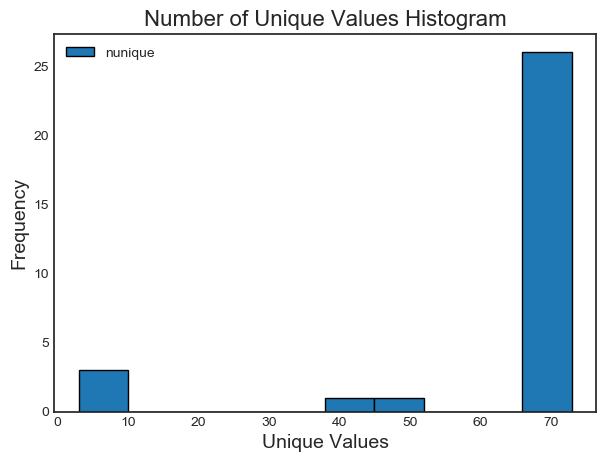

In [ ]:
fs.plot_unique()

## Binning

Segmentar o definir intervalos en una variable continua o redefinir las categorias en una variable cualitativa, puede ser útil en algunos casos. 

Para el caso de una variable numérica continua que se desee modificar a una variable categórica se puede utilizar el siguiente código.

In [ ]:
data13=data['Stream Lenght']
print(data13.max())
print(data13.min())
data13 = pd.cut(data13, bins=[0,100,200,300,400,500,600], labels=["low", "low mid","mid","high mid","high","very high"])
data13.head(5)

533.626
3.503


0         low
1         low
2         low
3    high mid
4         low
Name: Stream Lenght, dtype: category
Categories (6, object): ['low' < 'low mid' < 'mid' < 'high mid' < 'high' < 'very high']

Para el caso de una variable categórica que se quiera reclasificar en un valor menor de categorias se puede utilizar el siguiente código.

In [ ]:
lista=pd.DataFrame(data=['Spain', 'Italy', 'Australia', 'Chile', 'Brazil'], columns=['paises'])

conditions = [
    lista['paises'].str.contains('Spain'),
    lista['paises'].str.contains('Italy'),
    lista['paises'].str.contains('Chile'),
    lista['paises'].str.contains('Brazil')]

choices = ['Europe', 'Europe', 'South America', 'South America']

continente= np.select(conditions, choices, default='Other')
continente

array(['Europe', 'Europe', 'Other', 'South America', 'South America'],
      dtype='<U13')

## Variables categóricas

Las variables categóricas deben ser transformadas a un valor numérico de tal forma que se pueda trabajar con ellas en los métodos de *machine learning*. Para eso existen diferentes estrategias de acuerdo con el caso de cada variable.

De forma general se puede transformar una variable categórica en variables numéricas de la siguiente forma.

In [ ]:
Cat={'A':1,'B':2,'C':3}
data['Categoria']=data['Categoria'].map(Cat)
data['Categoria'].head(5)

0    1
1    2
2    1
3    2
4    2
Name: Categoria, dtype: int64

Sin embargo la librería de *machine learning* Science Kit Learning (sckitlearn) presenta diferentes funciones para esta labor. la primera de ellas *LabelEncoder*. Con esta función se transforman las variables en número enteros de acuerdo con el número de categorias que existan.

In [ ]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
le=LabelEncoder()
X['Categoria']=le.fit_transform(X['Categoria'])
X['Categoria']

0     0
1     1
2     0
3     1
4     1
5     2
6     0
7     2
8     1
9     0
10    2
11    1
12    2
13    2
14    2
15    1
16    1
17    0
18    0
19    1
20    2
21    0
22    2
23    0
24    0
25    0
26    1
27    1
28    2
29    2
     ..
43    2
44    2
45    1
46    1
47    0
48    0
49    2
50    0
51    1
52    2
53    0
54    2
55    1
56    1
57    2
58    0
59    1
60    2
61    1
62    0
63    1
64    1
65    1
66    2
67    2
68    0
69    1
70    2
71    0
72    1
Name: Categoria, Length: 73, dtype: int64

Sin embargo, la trasformación anterior puede generar problemas en el modelo ya que en los números consecutivos asignados existe una jerarquía o peso, es decir el 2 > 1, lo cual no necesariamente se presente en la variable categórica original. 

En estos casos se recomienda utilizar una tranformación binaria  (0,1) a cada categoria, por lo tanto se obtendran nuevas variables en igual número de categorias de la variable a transformar.  es decir que aumenta el número de dimensiones del problema a resolver.

In [ ]:
ohe=OneHotEncoder(sparse=False)
data15=np.array(X['Categoria']).reshape(-1,1)
data15=ohe.fit_transform(data15)
data15

C:\Users\Edier Aristizabal\AppData\Local\conda\conda\envs\myenm\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


array([[1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0

Otra forma de hacerlo directamente es con la función *get_dummies*.

In [ ]:
data15=pd.get_dummies(data, prefix='Col', columns=['Color'])
data15.head()

,Unnamed: 0,Name,Main Stream Order,Number of streams,Stream Lenght,Main Stream Leght,Stream Lenght Ratio,Bifurcation Ratio,Ro Coefficient,Lenght of Basin,Area,Perimeter,Form Factor,Elongation Ratio,Circularity Ratio,Compactness Coefficient,Texture Ratio,Fitness Ratio,Wandering ratio,Stream Frequency,Drainage Density,Constant Channel mantenance,Drainage Intensity,Infiltrarion Number,Leght of overland flow,Relief,Categoria,Relief Ratio,Rudgeness Number,Melton Index,Ln Melton,Flash flood record,Col_amarillo,Col_rojo,Col_verde
0,0,DESMOTADORA (Dabeiba),2.0,3,4.9820,4.048,0.907351,2.00,2.20422,5.904,5.1330,12.454,0.147258,0.433006,0.415876,1.561689,0.160591,0.325036,0.685637,0.584454,0.970583,1.030309,0.602168,0.567260,0.515155,1.319,A,0.223408,1.280198,0.582183,-0.540971,Torrencial,1,0,0
1,1,LA ARBOLEDA (Cdad Bolivar) ¿represamiento?,2.0,3,6.5693,5.997,0.531716,2.00,3.7614,8.961,13.5680,18.516,0.168967,0.463828,0.497315,1.428106,0.108015,0.323882,0.669233,0.221108,0.484176,2.065365,0.45667,0.107055,1.032682,1.968,B,0.219618,0.952858,0.534278,-0.626839,Torrencial,0,0,1
2,2,LIBORIANA (Salgar),3.0,12,31.8530,18.117,1.496572,3.25,2.09929,20.617,58.6032,47.543,0.137870,0.418977,0.325805,1.764400,0.189302,0.381066,0.878741,0.204767,0.543537,1.839802,0.376731,0.111298,0.919901,2.484,A,0.120483,1.350146,0.324482,-1.125524,Torrencial,0,0,0
3,3,LA ARENOSA (San Carlos),NaN,31,338.2300,6.152,2.050357,5.00,2.96581,7.199,12.0600,17.075,0.232704,0.544323,0.519799,1.396877,1.464129,0.360293,0.854563,2.570481,2.193947,0.455800,1.17162,5.639499,0.227900,0.903,B,0.125434,1.981134,0.260024,-1.346980,Torrencial,1,0,0
4,4,EL BARRO (Bello),NaN,4,10.4070,7.350,5.128386,3.00,0.584979,9.523,10.6980,20.898,0.117966,0.387554,0.307824,1.815201,0.143554,0.351708,0.771816,0.373902,0.972799,1.027962,0.384357,0.363731,0.513981,1.299,B,0.136407,1.263665,0.397153,-0.923434,Torrencial,0,1,0


Para adicionar nuevas columnas y eliminar columnas del dataFrame, se utiliza:

In [ ]:
new_columns=pd.get_dummies(data['Color'],prefix='color')
data15=data.join(new_columns).drop(data['Color'])

## Escalar

Algunos algoritmos de *machine learning*, tales como Neural Networks, regresión, KNN, support vector machine, PCA, y análisis discriminante linear no se desempeñan adecuadamente si las variables (features) no están en la misma escala. Es por esta razón que se deben escalar, de tal forma que los modelos basados en medir distancias presenten resultados coherentes. En términos generales se tienen las siguientes recomendaciones:

- Utilice MinMaxScaler por defecto                                                                                           
- Utilice RobustScaler si tiene outliers y un gran rango entre variables                                                     
- Utilice StandardScaler si necesita normalizar las variables 

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, Normalizer

StandardScaler escala cada columna para que tenga media 0 y varianza 1.

In [ ]:
data15=data[['Stream Lenght','Stream Lenght Ratio']]
st = StandardScaler()
data16 = st.fit_transform(data15)
print(type(data15))
print(data15)
print(type(data16))
print(data16)

RobustScaler sustrae de cada columna la media y divide por el rango intercuartil.

In [ ]:
rs=RobustScaler()
data17 = rs.fit_transform(data15)
data17

MinMaxScaler obtiene la media de la columna y divide por el rango

In [ ]:
mm = MinMaxScaler()
data18 = mm.fit_transform(data15)
data18

La función *Normalizer* a diferencia de las otras opera sobre las filas, y aplica por defecto la normalización conocidad como l2.

In [ ]:
n = Normalizer()
data19 = n.fit_transform(data15)
data19